In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pylab as plt
import fiona
import descartes
from shapely.geometry import Point, Polygon
from shapely import wkt
from numpy import inf
%matplotlib inline

### Portland Geo Spatial data

In [2]:
#Get Porland Geoinformation
portland=pd.read_csv("Final_merged_city_portland.csv")
Portland=portland[portland['year']==2017]
P_Geo=Portland[['geo_id','geometry']]
P_Geo.head()

,geo_id,geometry
7,41051010402,MULTIPOLYGON (((-122.3868792758254 45.51902980...
15,41051010500,MULTIPOLYGON (((-122.3970989671113 45.57260058...
23,41051010500,MULTIPOLYGON (((-122.3970989671113 45.57260058...
31,41051009603,MULTIPOLYGON (((-122.4661255423961 45.53952849...
39,41051010100,MULTIPOLYGON (((-122.4566475168594 45.53948853...


In [3]:
P_Geo['geometry'] = P_Geo['geometry'].apply(wkt.loads)
#crs = {'init':'epsg:4326'}
P_G = gpd.GeoDataFrame(P_Geo, geometry='geometry')

/Users/yanxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


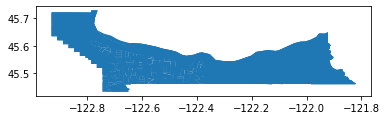

In [4]:
# Building the GeoDataframe 
crs = {'init':'epsg:4326'}
P_G = gpd.GeoDataFrame(P_G,crs=crs, geometry='geometry')

P_G .plot()

### Small business data

In [5]:
#Read Small business data
Education=pd.read_csv("Education.csv")
Pets=pd.read_csv("Pets.csv")
car=pd.read_csv("car.csv")
hotel=pd.read_csv("hotel.csv")
Financial=pd.read_csv("Financial.csv")
Beauty=pd.read_csv("Beauty.csv")
bicycles=pd.read_csv("bicycles.csv")
shopping=pd.read_csv("shopping.csv")
Arts_Entertainment=pd.read_csv("Arts_Entertainment.csv")
Nightlife=pd.read_csv("Nightlife.csv")
grocery=pd.read_csv("grocery.csv")
Home_Services=pd.read_csv("Home_Services.csv")
restaurant=pd.read_csv("restaurant.csv")

In [114]:
# restaurant=restaurant[restaurant['longitude']< -122.6]
# restaurant=restaurant[restaurant['latitude']< 45.65]

# shopping=shopping[shopping['longitude']< -122.6]
# shopping=shopping[shopping['latitude']< 45.65]

# Nightlife=Nightlife[Nightlife['longitude']< -122.6]
# Nightlife=Nightlife[Nightlife['latitude']< 45.65]

# Pets=Pets[Pets['longitude']< -122.53]
# Pets=Pets[Pets['latitude']< 45.57]

# Education=Education[Education['longitude']< -122.55]
# Education=Education[Education['latitude']< 45.58]

In [6]:
types=[Education,Pets,car,hotel,Financial,Beauty,bicycles,shopping,Arts_Entertainment,Nightlife,grocery,Home_Services,restaurant]
Small=pd.concat(types)
Small.rename(columns={'Unnamed: 0':'Name'}, inplace=True)
Small.head()

,Name,Business_id,categories,type,rating,review_count,zipcode,latitude,longitude
0,Tim True Acting Classes,mMxsS8Y6bv0zCRJpFAhbEA,vocation,Education,5.0,2.0,97209.0,45.528728,-122.687462
1,University of Oregon in Portland,NBZuIw_kByebLfgzFo4lgQ,collegeuniv,Education,4.5,3.0,97209.0,45.523490,-122.670790
2,Maitripa College,RJNbq0tu5iaXZhmQM7XZ2g,collegeuniv,Education,4.5,6.0,97214.0,45.510876,-122.654477
3,Song Garden School,1aCXjQ3DM_qOkll9ZNvMQA,preschools,Education,5.0,5.0,97214.0,45.500880,-122.623310
4,Oregon Ballet School,unNiXsw2I4bRPVcoxtjb7w,theater,Education,5.0,1.0,97205.0,45.520123,-122.682466


In [7]:
#
Small=Small[Small['longitude']< -122.2]
Small=Small[Small['latitude']> 45.4]
Small=Small[Small['longitude']> -122.8]
Small=Small[Small['latitude']< 45.7]
geometry = [Point(xy) for xy in zip(Small['longitude'],Small['latitude'])]
crs = {'init':'epsg:4326'}
Small_geo = gpd.GeoDataFrame(Small, crs = crs, geometry = geometry)

Small_geo.head()

,Name,Business_id,categories,type,rating,review_count,zipcode,latitude,longitude,geometry
0,Tim True Acting Classes,mMxsS8Y6bv0zCRJpFAhbEA,vocation,Education,5.0,2.0,97209.0,45.528728,-122.687462,POINT (-122.68746 45.52873)
1,University of Oregon in Portland,NBZuIw_kByebLfgzFo4lgQ,collegeuniv,Education,4.5,3.0,97209.0,45.523490,-122.670790,POINT (-122.67079 45.52349)
2,Maitripa College,RJNbq0tu5iaXZhmQM7XZ2g,collegeuniv,Education,4.5,6.0,97214.0,45.510876,-122.654477,POINT (-122.65448 45.51088)
3,Song Garden School,1aCXjQ3DM_qOkll9ZNvMQA,preschools,Education,5.0,5.0,97214.0,45.500880,-122.623310,POINT (-122.62331 45.50088)
4,Oregon Ballet School,unNiXsw2I4bRPVcoxtjb7w,theater,Education,5.0,1.0,97205.0,45.520123,-122.682466,POINT (-122.68247 45.52012)


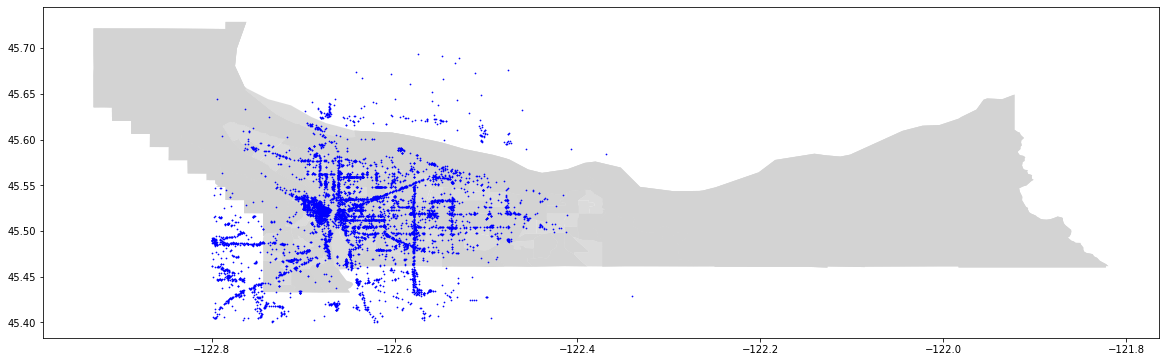

In [8]:
fig, ax = plt.subplots(figsize = (20, 12))
P_G.plot(ax = ax, alpha = 0.8, color = 'lightgrey')
Small_geo.plot(ax = ax, color = 'blue', marker = 'o', markersize = 0.5,label='Education')

## Spatial Join small business with Portland GeoId

In [9]:
New_geo = gpd.sjoin(Small_geo,P_G, op='within')
New_geo.head()

,Name,Business_id,categories,type,rating,review_count,zipcode,latitude,longitude,geometry,index_right,geo_id
0,Tim True Acting Classes,mMxsS8Y6bv0zCRJpFAhbEA,vocation,Education,5.0,2.0,97209.0,45.528728,-122.687462,POINT (-122.68746 45.52873),839,41051005000
10,Acting for Kids & Teens,19mIUTnqfUQUu6TguP_6Ng,theater,Education,5.0,2.0,97214.0,45.526678,-122.687930,POINT (-122.68793 45.52668),839,41051005000
38,Barbara Kite Acting Studio,j0TR9ZTc4HhwhaNDBwWlrA,specialtyschools,Education,5.0,1.0,97209.0,45.526672,-122.688015,POINT (-122.68801 45.52667),839,41051005000
42,Pelonca School of Music,9cJ0hyfZh-p6xnQ_LINF0w,specialtyschools,Education,5.0,1.0,97209.0,45.533890,-122.689130,POINT (-122.68913 45.53389),839,41051005000
96,New Avenues INK,dMFlNokhIY20FW5bqF2Mog,screen_printing_tshirt_printing,Education,5.0,1.0,97209.0,45.530180,-122.685770,POINT (-122.68577 45.53018),839,41051005000


In [10]:
#Mean rating of different types of small business in each geoID
Number_geo=New_geo[['geo_id','type','Name']]
New_geo.groupby(['geo_id','type']).mean()

rating  review_count  zipcode   latitude  \
geo_id      type                                                             
41051000100 Arts_Entertainment  4.055556     27.333333  97202.0  45.468536   
            Beauty&Spa          4.807692     10.307692  97202.0  45.470331   
            Car                 4.333333     42.666667  97202.0  45.465884   
            Education           4.300000      6.200000  97202.0  45.469938   
            Financial           3.833333      4.833333  97202.0  45.466061   
...                                  ...           ...      ...        ...   
41051980000 Arts_Entertainment  1.500000      2.500000  97222.0  45.549625   
            Car                 4.250000      4.500000  97217.0  45.557394   
            Home_Services       5.000000      4.000000  97217.0  45.562050   
            Shopping            1.000000      1.000000  97217.0  45.571100   
            restaurant          4.000000     36.000000  97217.0  45.557030   

                                 longitude  index_right  
geo_id      type                                         
41051000100 Arts_Entertainment -122.657431        463.0  
            Beauty&Spa         -122.650353        463.0  
            Car                -122.652601        463.0  
            Education          -122.650251        463.0  
            Financial          -122.655045        463.0  
...                                    ...          ...  
41051980000 Arts_Entertainment -122.694670       1771.0  
            Car                -122.702164       1771.0  
            Home_Services      -122.712120       1771.0  
            Shopping           -122.715860       1771.0  
            restaurant         -122.702320       1771.0  

[1370 rows x 6 columns]

### 1. Count total number of different types of small business

In [11]:
#Count total number of different types of small business
Number_geo=New_geo[['geo_id','type','Name']]
New_number=Number_geo.groupby(['geo_id','type']).count().unstack().fillna(0)
New_number.columns = New_number.columns.droplevel()
New_number.head()

type,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
geo_id,,,,,,,,,,,,,
41051000100,9.0,13.0,3.0,5.0,6.0,5.0,5.0,5.0,17.0,2.0,6.0,0.0,36.0
41051000200,12.0,10.0,8.0,12.0,6.0,2.0,2.0,20.0,4.0,0.0,4.0,0.0,36.0
41051000301,2.0,0.0,4.0,6.0,0.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
41051000302,0.0,6.0,3.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,12.0
41051000401,0.0,16.0,2.0,0.0,14.0,0.0,10.0,2.0,12.0,2.0,6.0,0.0,20.0


In [370]:
for i in types:
    New_number[i]= np.log(New_number[i])

New_number[New_number== -inf] = 0
New_number.head()

/Users/yanxu/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


type,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
geo_id,,,,,,,,,,,,,
41051000100,0.787195,0.941939,0.094048,0.475885,0.583198,0.475885,0.475885,0.475885,1.041412,-0.366513,0.583198,0.0,1.276345
41051000200,0.910235,0.834032,0.732099,0.910235,0.583198,-0.366513,-0.366513,1.097189,0.326634,0.000000,0.326634,0.0,1.276345
41051000301,-0.366513,0.000000,0.326634,0.583198,0.000000,0.326634,0.000000,0.000000,0.000000,0.000000,0.326634,0.0,0.094048
41051000302,0.000000,0.583198,0.094048,0.583198,0.000000,0.094048,0.000000,0.000000,0.000000,0.000000,0.094048,0.0,0.910235
41051000401,0.000000,1.019781,-0.366513,0.000000,0.970422,0.000000,0.834032,-0.366513,0.910235,-0.366513,0.583198,0.0,1.097189


In [345]:
Number_geo=P_G.merge(New_number,on='geo_id')
Number_geo.head()

,geo_id,geometry,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
0,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.0,0.0,0.0,0.000000,1.098612,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.0,0.0,0.0,0.000000,1.098612,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.0,0.0,0.0,0.000000,1.098612,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,41051010100,"MULTIPOLYGON (((-122.45665 45.53949, -122.4533...",0.0,0.0,0.0,1.386294,2.484907,1.386294,0.0,0.0,0.0,0.0,0.0,0.0,2.484907
4,41051010100,"MULTIPOLYGON (((-122.45665 45.53949, -122.4533...",0.0,0.0,0.0,1.386294,2.484907,1.386294,0.0,0.0,0.0,0.0,0.0,0.0,2.484907



                     Distribution of different types of small businesses in each GeoId



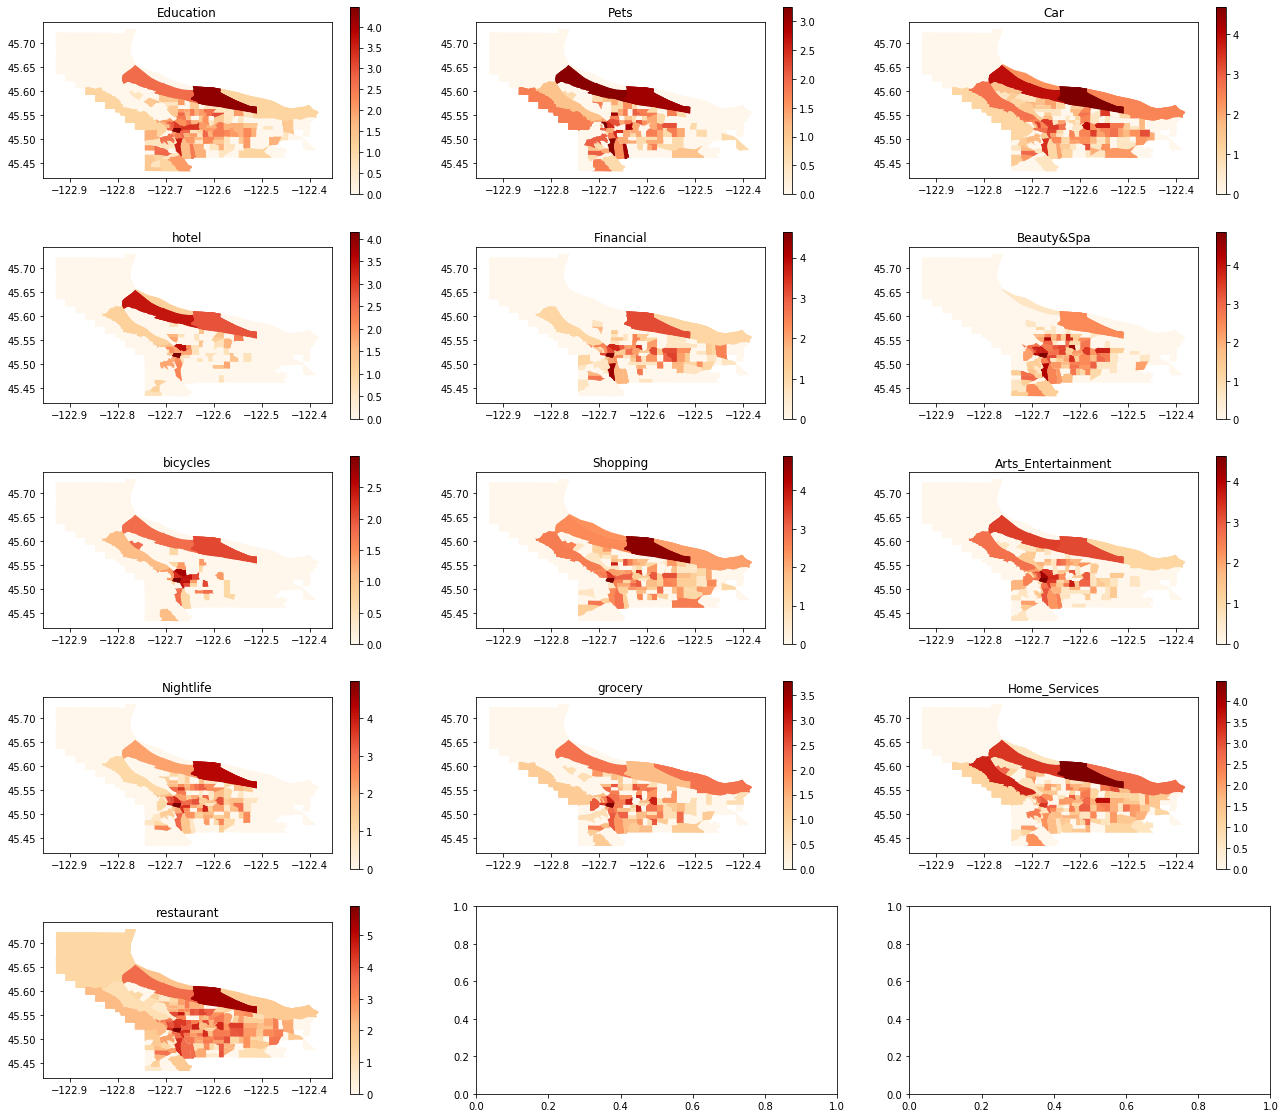

In [362]:
types=['Education','Pets','Car','hotel','Financial','Beauty&Spa',
       'bicycles','Shopping','Arts_Entertainment',
       'Nightlife','grocery','Home_Services','restaurant']
print()
print('                     Distribution of different types of small businesses in each GeoId')
print()
f1, ax = plt.subplots(5,3, figsize=(22,20))
index = 0
for i in range(5):
    for j in range(3):
        ax[i,j].set_title(types[index], fontsize=12) 
        Number_geo.plot(ax=ax[i,j], column=types[index],cmap='OrRd',legend=True)
        index += 1
        if index >= 13:
            break
    if index >= 13:
        break
f1.savefig('Distribution of different types.png', dpi=300)

### 2.Rating mean for each types in each GeoId

In [369]:
#Mean rating of different types of small business in each geoID
rating_geo=New_geo[['geo_id','type','rating']]
rating_mean=rating_geo.groupby(['geo_id','type']).mean().unstack().fillna(0)
rating_mean.columns = rating_mean.columns.droplevel()
rating_mean.head()

type,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
geo_id,,,,,,,,,,,,,
41051000100,4.055556,4.807692,4.333333,4.300000,3.833333,4.8,4.1,4.20,4.470588,4.5,4.083333,0.0,4.166667
41051000200,4.250000,4.600000,4.625000,4.916667,3.833333,4.5,3.0,4.35,5.000000,0.0,3.500000,0.0,4.000000
41051000301,4.250000,0.000000,4.375000,4.333333,0.000000,5.0,0.0,5.00,0.000000,0.0,3.875000,0.0,3.833333
41051000302,0.000000,4.000000,3.500000,4.750000,0.000000,5.0,0.0,0.00,0.000000,0.0,4.500000,0.0,4.000000
41051000401,0.000000,4.562500,4.000000,0.000000,3.500000,0.0,3.7,3.50,3.666667,4.5,3.166667,0.0,4.000000


In [207]:
rating_geo=P_G.merge(rating_mean,on='geo_id')
rating_geo.head()

,geo_id,geometry,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
0,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.0,0.0,0.0,0.0,3.000000,4.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.0,0.0,0.0,0.0,3.000000,4.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.0,0.0,0.0,0.0,3.000000,4.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,41051010100,"MULTIPOLYGON (((-122.45665 45.53949, -122.4533...",0.0,0.0,0.0,5.0,3.166667,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.833333
4,41051010100,"MULTIPOLYGON (((-122.45665 45.53949, -122.4533...",0.0,0.0,0.0,5.0,3.166667,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.833333



                         Average Rating of different types of small businesses



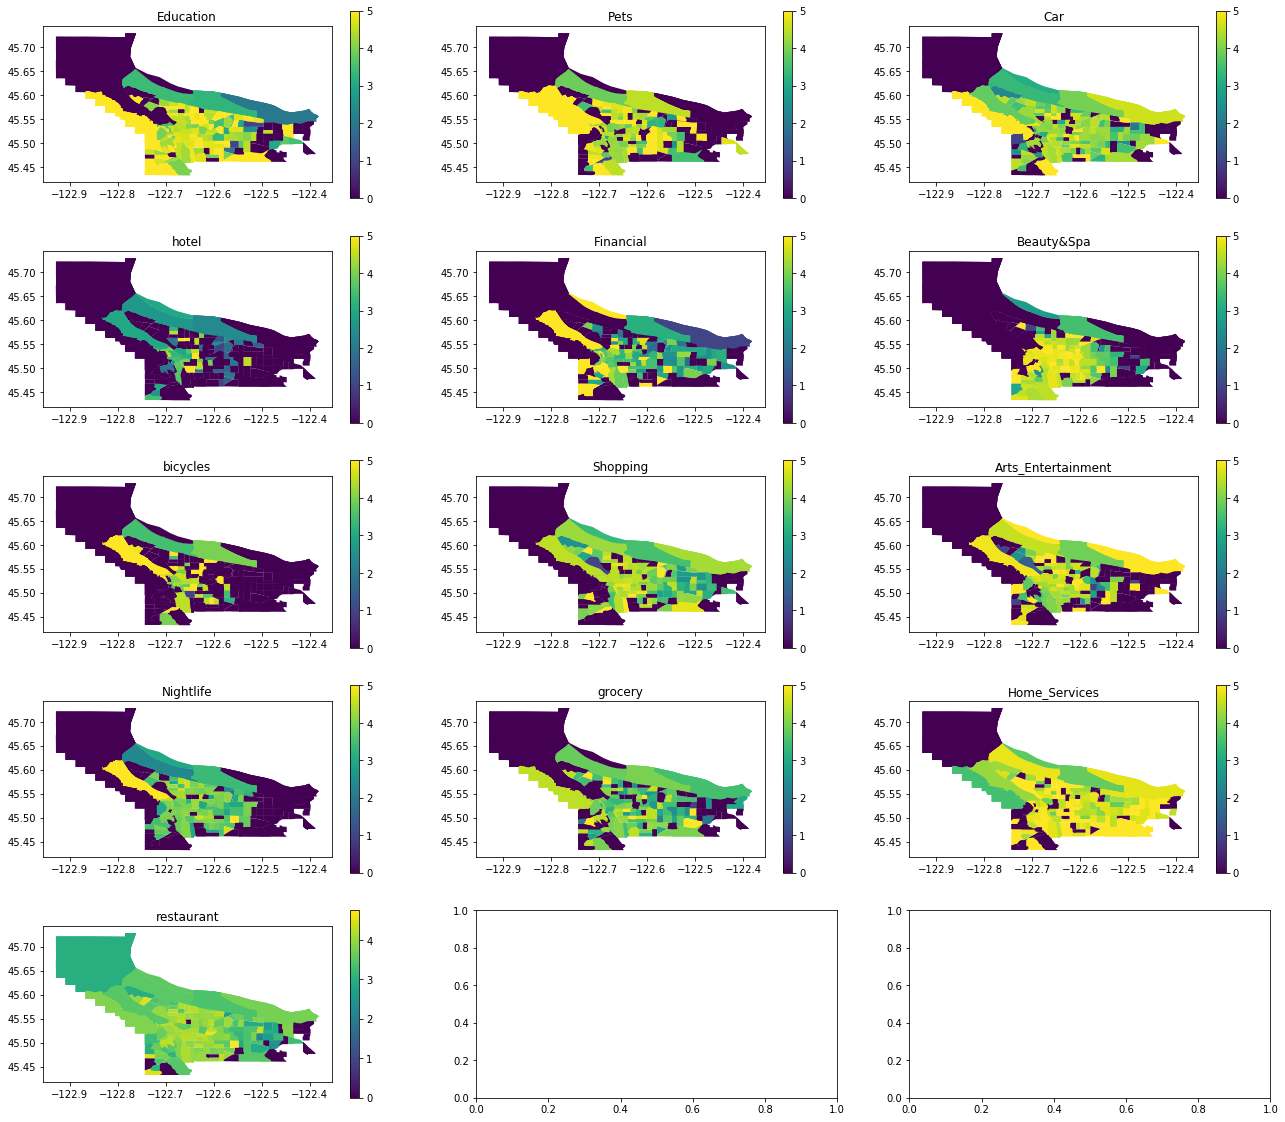

In [363]:
types=['Education','Pets','Car','hotel','Financial','Beauty&Spa',
       'bicycles','Shopping','Arts_Entertainment',
       'Nightlife','grocery','Home_Services','restaurant']
print()
print('                         Average Rating of different types of small businesses')
print()
f2, ax = plt.subplots(5,3, figsize=(22,20))
index = 0
for i in range(5):
    for j in range(3):
        ax[i,j].set_title(types[index], fontsize=12) 
        rating_geo.plot(ax=ax[i,j], column=types[index],legend=True)
        index += 1
        if index >= 13:
            break
    if index >= 13:
        break 

f2.savefig('Average Rating.png', dpi=300)

### 3. Review_counts for each Geo Id

In [368]:
#Review Count of different types of small business in each geoID
review_geo=New_geo[['geo_id','type','review_count']]
review_sum=review_geo.groupby(['geo_id','type']).sum().unstack().fillna(0)
review_sum.columns = review_sum.columns.droplevel()
review_sum.head()

type,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
geo_id,,,,,,,,,,,,,
41051000100,246.0,134.0,128.0,31.0,29.0,109.0,421.0,111.0,341.0,129.0,227.0,0.0,6124.0
41051000200,592.0,414.0,306.0,182.0,62.0,30.0,36.0,348.0,44.0,0.0,60.0,0.0,5406.0
41051000301,169.0,0.0,98.0,87.0,0.0,34.0,0.0,58.0,0.0,0.0,192.0,0.0,105.0
41051000302,0.0,219.0,69.0,15.0,0.0,15.0,0.0,0.0,0.0,0.0,1410.0,0.0,3822.0
41051000401,0.0,102.0,50.0,0.0,58.0,0.0,1890.0,92.0,402.0,66.0,472.0,0.0,3210.0


In [367]:
for i in types:
    review_sum[i]= np.log(review_sum[i])

review_sum[review_sum == -inf] = 0
review_sum.head()

/Users/yanxu/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yanxu/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


type,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
geo_id,,,,,,,,,,,,,
41051000100,0.533986,0.462975,0.457043,0.210036,0.194011,0.435490,0.587142,0.437989,0.567210,0.458057,0.525325,0.0,0.772705
41051000200,0.617193,0.585596,0.556523,0.500429,0.348954,0.202228,0.244001,0.569180,0.285804,0.000000,0.343311,0.0,0.766031
41051000301,0.491695,0.000000,0.420540,0.403111,0.000000,0.231323,0.000000,0.337395,0.000000,0.000000,0.506610,0.0,0.430300
41051000302,0.000000,0.521393,0.366844,-0.003778,0.000000,-0.003778,0.000000,0.000000,0.000000,0.000000,0.683696,0.0,0.746704
41051000401,0.000000,0.426228,0.310462,0.000000,0.337395,0.000000,0.703492,0.411386,0.582868,0.359504,0.597509,0.0,0.736519



                     Review_counts distribution of different types of small businesses



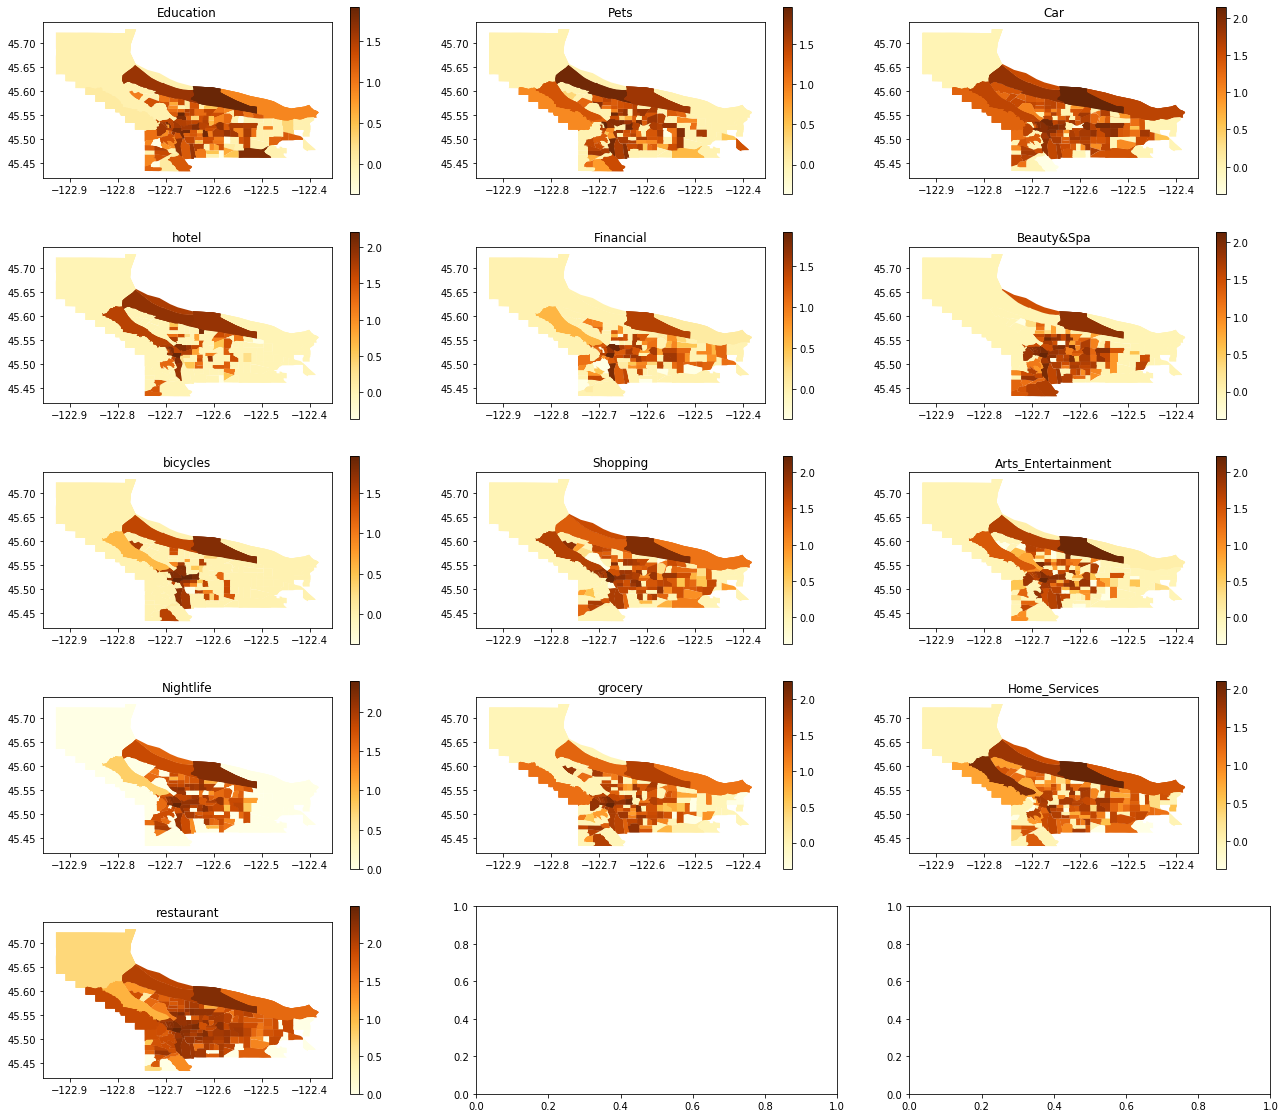

In [364]:
review_count=P_G.merge(review_sum,on='geo_id')
print()
print('                     Review_counts distribution of different types of small businesses')
print()
f3, ax = plt.subplots(5,3, figsize=(22,20))

index = 0
for i in range(5):
    for j in range(3):
        ax[i,j].set_title(types[index], fontsize=12) 
        review_count.plot(ax=ax[i,j], column=types[index],cmap='YlOrBr',legend=True)
        index += 1
        if index >= 13:
            break
    if index >= 13:
        break 
        
f3.savefig('Review_counts_distribution', dpi=300)

### High Rating ratio

In [12]:
High_rating=New_geo[New_geo['rating']>=4.5]
High_rating.head()

,Name,Business_id,categories,type,rating,review_count,zipcode,latitude,longitude,geometry,index_right,geo_id
0,Tim True Acting Classes,mMxsS8Y6bv0zCRJpFAhbEA,vocation,Education,5.0,2.0,97209.0,45.528728,-122.687462,POINT (-122.68746 45.52873),839,41051005000
10,Acting for Kids & Teens,19mIUTnqfUQUu6TguP_6Ng,theater,Education,5.0,2.0,97214.0,45.526678,-122.687930,POINT (-122.68793 45.52668),839,41051005000
38,Barbara Kite Acting Studio,j0TR9ZTc4HhwhaNDBwWlrA,specialtyschools,Education,5.0,1.0,97209.0,45.526672,-122.688015,POINT (-122.68801 45.52667),839,41051005000
42,Pelonca School of Music,9cJ0hyfZh-p6xnQ_LINF0w,specialtyschools,Education,5.0,1.0,97209.0,45.533890,-122.689130,POINT (-122.68913 45.53389),839,41051005000
96,New Avenues INK,dMFlNokhIY20FW5bqF2Mog,screen_printing_tshirt_printing,Education,5.0,1.0,97209.0,45.530180,-122.685770,POINT (-122.68577 45.53018),839,41051005000


In [15]:
#Count total number of different types of small business
Number_geo=New_geo[['geo_id','type','Name']]
New_number=Number_geo.groupby(['geo_id','type']).count().unstack().fillna(0)
New_number.columns = New_number.columns.droplevel()
New_number.head()

type,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
geo_id,,,,,,,,,,,,,
41051000100,9.0,13.0,3.0,5.0,6.0,5.0,5.0,5.0,17.0,2.0,6.0,0.0,36.0
41051000200,12.0,10.0,8.0,12.0,6.0,2.0,2.0,20.0,4.0,0.0,4.0,0.0,36.0
41051000301,2.0,0.0,4.0,6.0,0.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
41051000302,0.0,6.0,3.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,12.0
41051000401,0.0,16.0,2.0,0.0,14.0,0.0,10.0,2.0,12.0,2.0,6.0,0.0,20.0


In [13]:
High_geo=High_rating[['geo_id','type','rating']]
High_geo=High_geo.groupby(['geo_id','type']).count().unstack().fillna(0)
High_geo.columns = High_geo.columns.droplevel()
High_geo.head()

type,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
geo_id,,,,,,,,,,,,,
41051000100,4.0,13.0,2.0,3.0,3.0,5.0,2.0,2.0,12.0,2.0,3.0,0.0,16.0
41051000200,8.0,10.0,8.0,12.0,2.0,2.0,0.0,14.0,4.0,0.0,2.0,0.0,14.0
41051000301,1.0,0.0,2.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
41051000302,0.0,3.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
41051000401,0.0,12.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,2.0,0.0,0.0,4.0


In [25]:
types=['Education','Pets','Car','hotel','Financial','Beauty&Spa',
       'bicycles','Shopping','Arts_Entertainment',
       'Nightlife','grocery','Home_Services','restaurant']
total_ratio = []
for j in types: 
    ratio=[]
    i=0
    for i in range(len(New_number.index)):
        if New_number.index[i] in High_geo.index:
            r = High_geo.loc[New_number.index[i]][j]/New_number.loc[New_number.index[i]][j]
            ratio.append(r)
            i+=1
        else:
            ratio.append(0)
    total_ratio.append(ratio)
    

/Users/yanxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [26]:
## count for the rating=5 ratio in each types
high_ratio=New_number
i=0
for i in range(len(types)):
    high_ratio[types[i]]=total_ratio[i]
    i+=1
        
high_ratio=high_ratio.fillna(0)
high_ratio.head()

type,Arts_Entertainment,Beauty&Spa,Car,Education,Financial,Home_Services,Nightlife,Pets,Shopping,bicycles,grocery,hotel,restaurant
geo_id,,,,,,,,,,,,,
41051000100,0.444444,1.00,0.666667,0.600000,0.500000,1.0,0.4,0.4,0.705882,1.0,0.5,0.0,0.444444
41051000200,0.666667,1.00,1.000000,1.000000,0.333333,1.0,0.0,0.7,1.000000,0.0,0.5,0.0,0.388889
41051000301,0.500000,0.00,0.500000,0.666667,0.000000,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.333333
41051000302,0.000000,0.50,0.000000,1.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.250000
41051000401,0.000000,0.75,0.000000,0.000000,0.142857,0.0,0.2,0.0,0.333333,1.0,0.0,0.0,0.200000


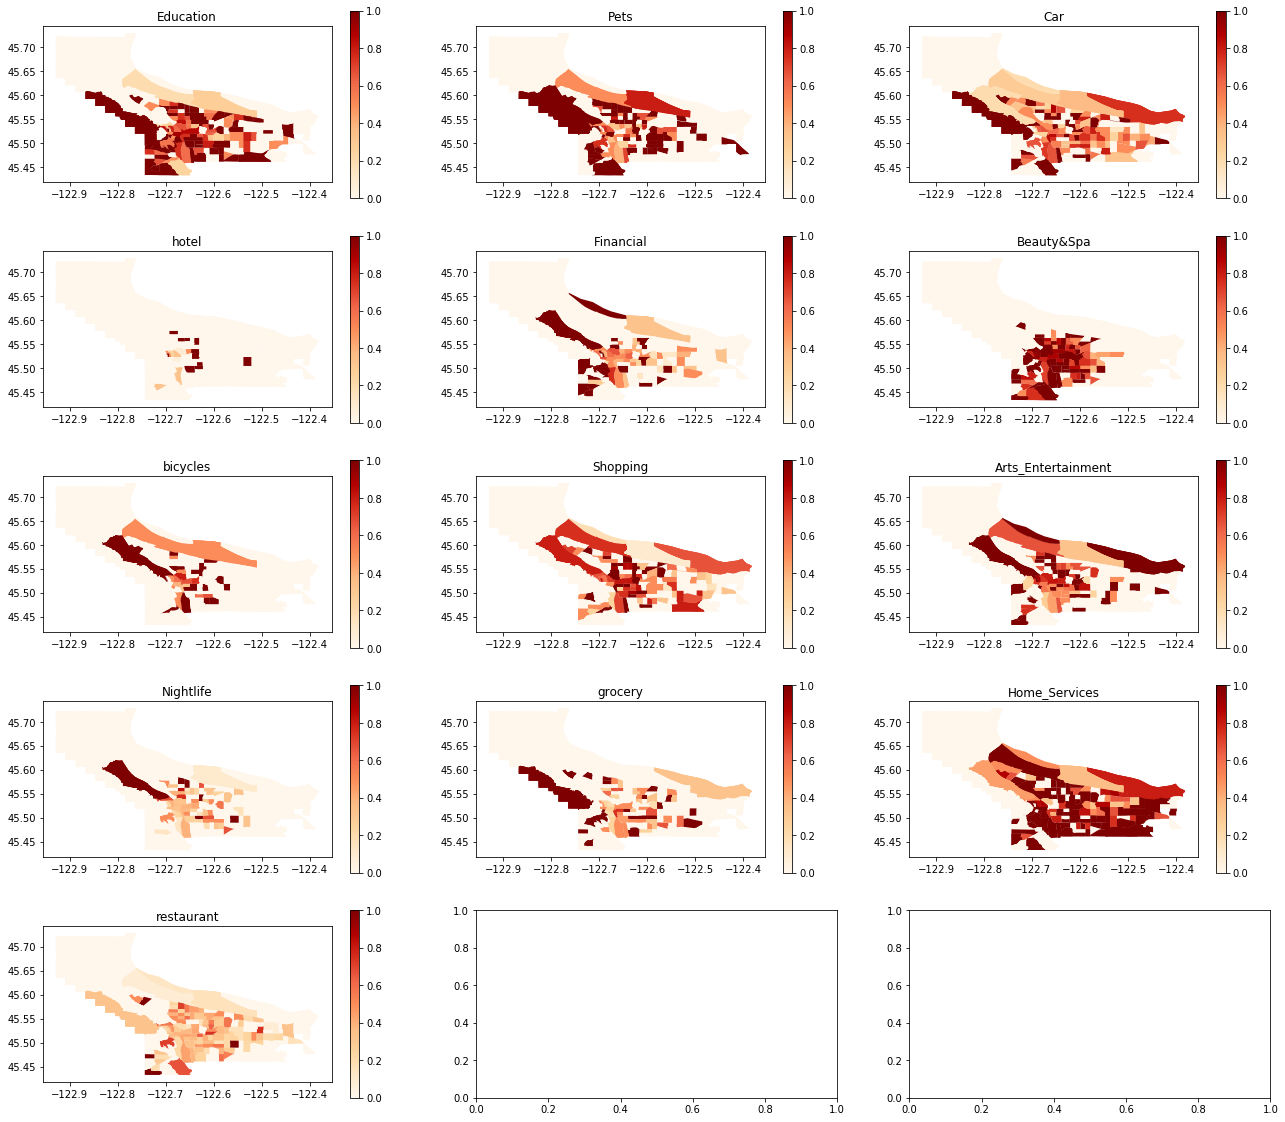

In [366]:
high=P_G.merge(high_ratio,on='geo_id')

f4, ax = plt.subplots(5,3, figsize=(22,20))

index = 0
for i in range(5):
    for j in range(3):
        ax[i,j].set_title(types[index], fontsize=12) 
        high.plot(ax=ax[i,j], column=types[index],cmap='OrRd',legend=True)
        index += 1
        if index >= 13:
            break
    if index >= 13:
        break 
f4.savefig('High Review Rating Ratio', dpi=300)